In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.metrics as metrics

import matplotlib.cm as cm #for rainbow colours
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
import pickle
import plotly.express as px
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import plot_tree
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 48)

In [ ]:
#loading dataframe
train_data = pd.read_csv('sample_data/input/df_train.csv', index_col=0)
test_data = pd.read_csv('sample_data/input/df_test.csv' , index_col = 0)

copy_test = test_data.copy()

In [ ]:
train_data.shape

(8763, 48)

In [ ]:
test_data.shape

(2920, 47)

In [ ]:
train_data.head(5)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [ ]:
test_data.head(5)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,193.333333,4.000000,176.666667,0.0,1.000000,0.0,sp25,0.0,0,1017.333333,0.0,0.0,0.0,0,800.0,800.000000,1025.666667,800.000000,NaN,284.483333,1030.000000,287.483333,287.483333,801.000000,283.673333,46.333333,287.483333,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,143.333333,4.666667,266.666667,0.0,0.666667,0.0,sp25,0.0,0,1020.333333,0.0,0.0,0.0,0,800.0,800.333333,1026.666667,800.000000,NaN,282.483333,1030.333333,284.150000,284.150000,721.000000,281.673333,53.666667,284.150000,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,130.000000,4.000000,263.333333,0.0,0.666667,0.0,sp25,0.0,0,1023.000000,0.0,0.0,0.0,0,800.0,800.000000,1025.333333,800.333333,NaN,280.816667,1030.666667,282.816667,282.816667,800.000000,280.613333,42.000000,282.816667,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,196.666667,2.333333,86.666667,0.0,1.333333,0.0,sp25,0.0,0,1025.666667,0.0,0.0,0.0,0,800.0,800.000000,1025.000000,800.333333,NaN,281.150000,1032.333333,283.483333,283.483333,801.333333,279.936667,45.000000,283.483333,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,233.333333,4.666667,283.333333,0.0,1.000000,0.0,sp25,0.0,0,1026.000000,0.0,0.0,0.0,0,800.0,800.333333,1022.333333,800.000000,NaN,287.150000,1032.333333,287.150000,287.150000,801.333333,285.570000,41.000000,287.150000,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


In [ ]:
# merging df_train and df_test
combined_data = pd.concat([train_data, test_data])
combined_data.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [ ]:
combined_data.describe()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,1.168300e+04,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,9161.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,8763.000000
mean,2.433750,0.118698,2.692873,63.774687,58.721818,43.440712,1.958629,14.155268,159.878855,2.782419,187.654241,20.668692,2.483067,0.108534,0.041120,0.023936,1.287326e+03,0.000182,0.043328,0.000331,0.000154,769.851665,764.603446,1017.482011,774.050843,1012.346687,296.007363,1011.797412,291.362722,290.788513,727.800750,293.170948,65.091814,290.229939,291.042128,289.377372,289.869413,284.993657,286.447784,288.616766,288.095397,291.263219,288.282055,287.056222,10673.857612
std,1.831762,0.334918,2.321759,22.219380,24.390621,32.046215,1.696043,24.541321,101.005654,1.758587,88.694717,28.478087,1.705508,0.556794,0.180425,0.482817,1.218906e+04,0.003171,0.163996,0.003466,0.010277,81.914258,90.736191,9.753552,72.909418,8.817473,8.929160,19.983122,7.441278,7.157835,113.616789,7.998774,19.040927,7.003619,7.236360,9.594562,6.680538,6.730076,6.738466,6.391989,6.898601,8.136234,9.258559,9.093455,5218.046404
min,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.706667e+02,0.000000,0.000000,0.000000,0.000000,211.000000,200.666667,971.333333,200.000000,972.666667,272.063000,927.666667,269.888000,269.888000,207.333333,272.063000,10.333333,269.888000,272.150000,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,1.000000,0.000000,1.000000,46.333333,38.000000,12.000000,1.000000,0.000000,76.666667,1.333333,116.666667,0.000000,1.000000,0.000000,0.000000,0.000000,1.013667e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.000000,1013.333333,800.000000,1010.666667,289.483333,1012.666667,285.783333,285.395500,701.000000,287.403167,51.333333,284.928833,285.338609,282.150000,284.816667,280.122526,281.483448,284.150000,283.150000,285.483333,281.250000,280.150000,7390.333333
50%,2.000000,0.000000,2.000000,67.000000,59.333333,45.000000,1.333333,0.000000,145.666667,2.333333,193.333333,0.000000,2.000000,0.000000,0.000000,0.000000,1.017333e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.000000,1018.666667,800.000000,1015.000000,295.483333,1017.333333,291.150000,290.483333,800.000000,292.470000,66.333333,289.820000,290.150000,287.843333,289.426667,284.816667,286.193333,288.276333,287.816667,290.382000,286.923333,285.816667,11114.666667
75%,3.333333,0.100000,3.666667,83.000000,80.000000,75.000000,2.666667,20.000000,233.333333,3.666667,260.000000,38.333333,3.333333,0.000000,0.000000,0.000000,1.021167e+03,0.000000,0.000000,0.000000,0.000000,800.666667,801.000000,1023.333333,800.000000,1018.000000,302.816667,1021.666667,297.159167,296.437500,801.666667,298.806667,80

In [ ]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11683 entries, 0 to 11682
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  11683 non-null  object 
 1   Madrid_wind_speed     11683 non-null  float64
 2   Valencia_wind_deg     11683 non-null  object 
 3   Bilbao_rain_1h        11683 non-null  float64
 4   Valencia_wind_speed   11683 non-null  float64
 5   Seville_humidity      11683 non-null  float64
 6   Madrid_humidity       11683 non-null  float64
 7   Bilbao_clouds_all     11683 non-null  float64
 8   Bilbao_wind_speed     11683 non-null  float64
 9   Seville_clouds_all    11683 non-null  float64
 10  Bilbao_wind_deg       11683 non-null  float64
 11  Barcelona_wind_speed  11683 non-null  float64
 12  Barcelona_wind_deg    11683 non-null  float64
 13  Madrid_clouds_all     11683 non-null  float64
 14  Seville_wind_speed    11683 non-null  float64
 15  Barcelona_rain_1h  

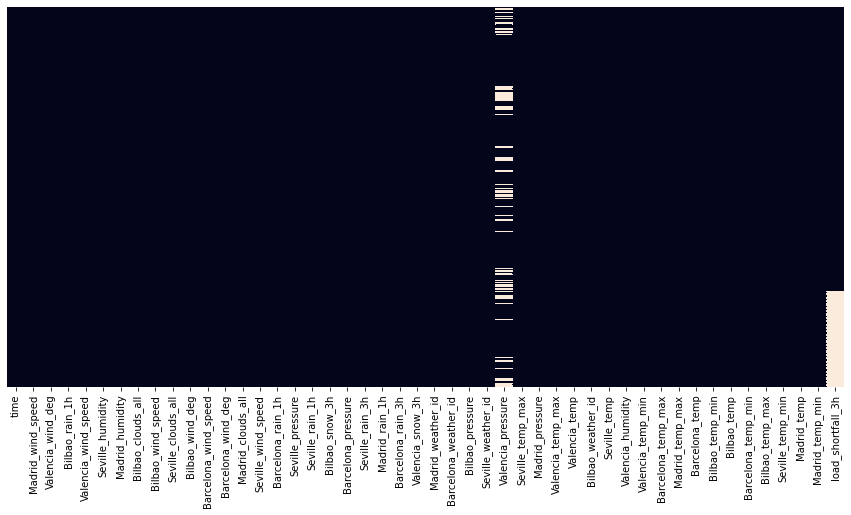

In [ ]:
# Bar chart showing the number of missing values in each column
plt.figure(figsize=(15,7))
sns.heatmap(combined_data.isna() , yticklabels=False , cbar=False)

In [ ]:
missing_values_train = combined_data.Valencia_pressure.isna().sum()
print(f'Train data Missing Values: {missing_values_train}  |   Percentage: {round(( missing_values_train/ combined_data.Valencia_pressure.shape[0]) *100, 2)}%')

Train data Missing Values: 2522  |   Percentage: 21.59%


In [ ]:
#Checking for unique values: the number of unique values for each column

import plotly.express as px

data = combined_data.drop(['load_shortfall_3h'] , axis=1)
data = data.nunique().reset_index()
data.columns = ['feature','nunique']

fig = px.bar(data, y='nunique', x='feature', text='nunique',
            title="Number of unique values for each column in Train Dataset")
fig.update_traces(textfont_size=15, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

In [ ]:
print(f'Mean: {combined_data.Valencia_pressure.mean()}')
print(f'Median: {combined_data.Valencia_pressure.median()}')
print(f'Mode: {combined_data.Valencia_pressure.mode()}')

Mean: 1012.3466870428985
Median: 1015.0
Mode: 0    1018.0
dtype: float64


In [ ]:
combined_data.Valencia_pressure.fillna(combined_data.Valencia_pressure.mode()[0], inplace=True)
combined_data.Valencia_pressure.fillna(combined_data.Valencia_pressure.mode()[0], inplace=True)

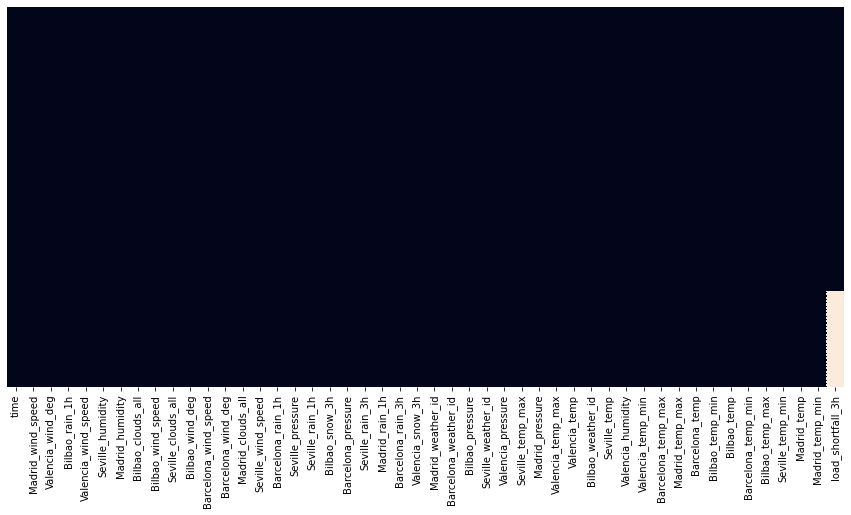

In [ ]:
# Bar chart showing the number of missing values in each column
plt.figure(figsize=(15,7))
sns.heatmap(combined_data.isna() , yticklabels=False , cbar=False)

In [ ]:
combined_data.dtypes.value_counts()

float64    45
object      3
dtype: int64

In [ ]:
#Evaluating the skewness
combined_data.skew()

Madrid_wind_speed        1.452792
Bilbao_rain_1h           5.694539
Valencia_wind_speed      3.116352
Seville_humidity        -0.366033
Madrid_humidity         -0.076590
Bilbao_clouds_all       -0.068335
Bilbao_wind_speed        1.602522
Seville_clouds_all       1.765104
Bilbao_wind_deg          0.246848
Barcelona_wind_speed     1.072417
Barcelona_wind_deg      -0.140337
Madrid_clouds_all        1.158486
Seville_wind_speed       1.213437
Barcelona_rain_1h        9.833191
Seville_rain_1h          7.535944
Bilbao_snow_3h          30.237039
Barcelona_pressure      66.949053
Seville_rain_3h         22.349167
Madrid_rain_1h           6.446514
Barcelona_rain_3h       14.668923
Valencia_snow_3h        73.090853
Madrid_weather_id       -2.909054
Barcelona_weather_id    -2.595417
Bilbao_pressure         -0.977531
Seville_weather_id      -3.230498
Valencia_pressure       -2.170499
Seville_temp_max         0.122162
Madrid_pressure         -2.140249
Valencia_temp_max        0.068277
Valencia_temp 

In [ ]:
#Evaluating the kurtosis
combined_data.kurtosis()

Madrid_wind_speed          2.156333
Bilbao_rain_1h            40.584429
Valencia_wind_speed       31.014311
Seville_humidity          -0.950169
Madrid_humidity           -1.151940
Bilbao_clouds_all         -1.519626
Bilbao_wind_speed          3.159652
Seville_clouds_all         1.950894
Bilbao_wind_deg           -1.064464
Barcelona_wind_speed       1.519692
Barcelona_wind_deg        -0.967252
Madrid_clouds_all         -0.076188
Seville_wind_speed         1.745508
Barcelona_rain_1h        130.956428
Seville_rain_1h           79.440881
Bilbao_snow_3h          1075.823322
Barcelona_pressure      4916.988101
Seville_rain_3h          552.067395
Madrid_rain_1h            63.372354
Barcelona_rain_3h        251.188884
Valencia_snow_3h        5452.830025
Madrid_weather_id          8.018543
Barcelona_weather_id       5.932283
Bilbao_pressure            1.847650
Seville_weather_id        10.402060
Valencia_pressure          4.605919
Seville_temp_max          -0.596016
Madrid_pressure            3

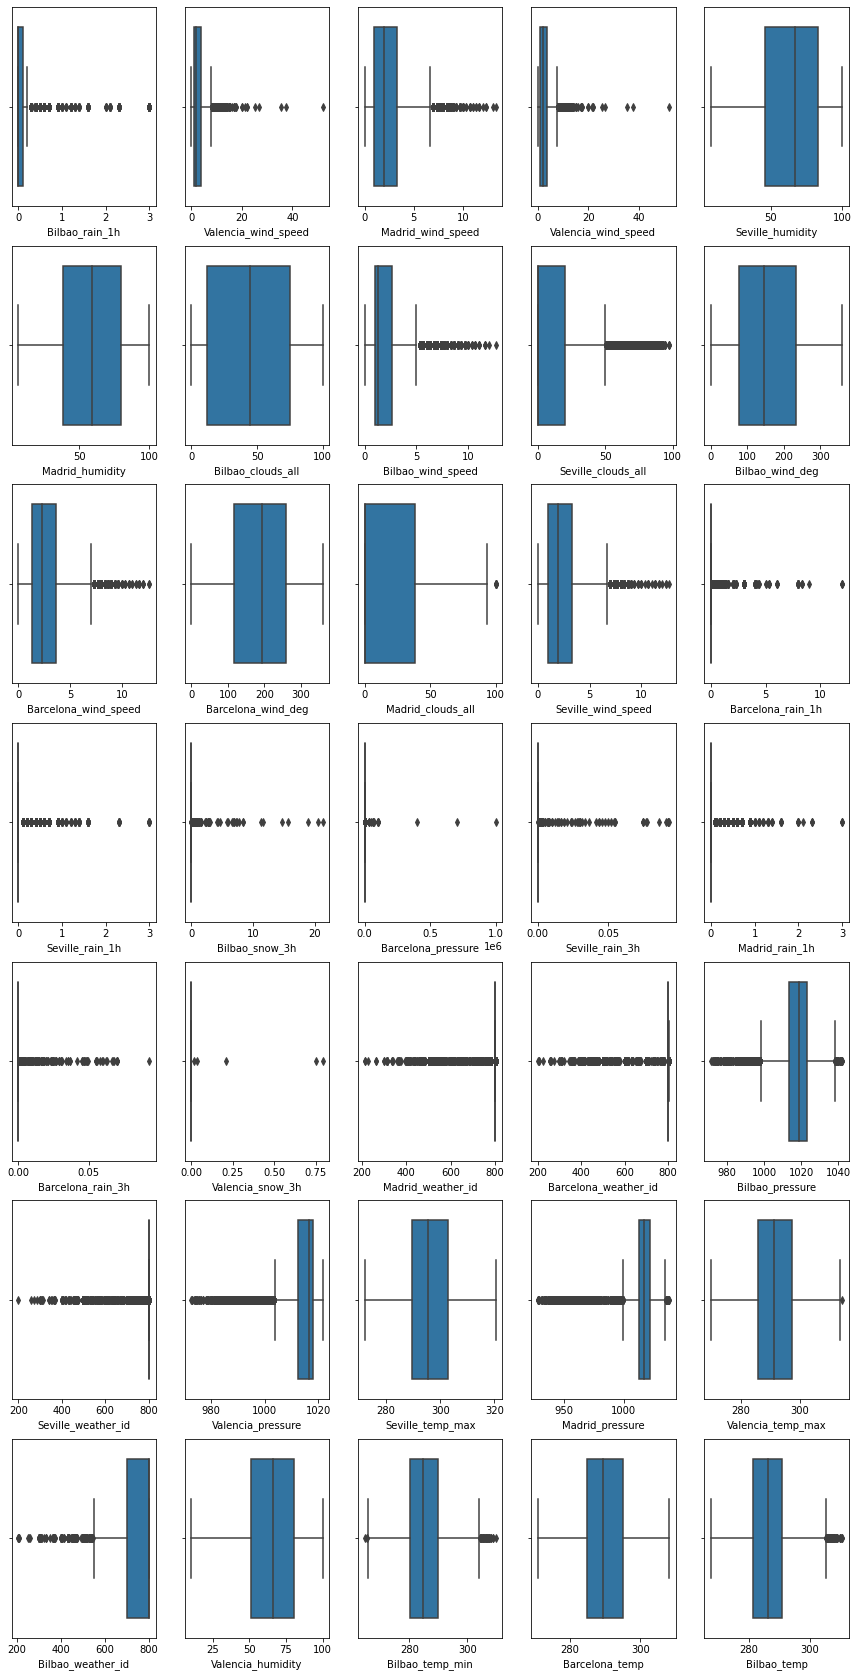

In [ ]:
fig, axes = plt.subplots(7, 5, figsize=(15, 30))
  
sns.boxplot(ax=axes[0, 0], data=combined_data, x='Bilbao_rain_1h')
sns.boxplot(ax=axes[0, 1], data=combined_data, x='Valencia_wind_speed')
sns.boxplot(ax=axes[0, 2], data=combined_data, x='Madrid_wind_speed')
sns.boxplot(ax=axes[0, 3], data=combined_data, x='Valencia_wind_speed')
sns.boxplot(ax=axes[0, 4], data=combined_data, x='Seville_humidity')
sns.boxplot(ax=axes[1, 0], data=combined_data, x='Madrid_humidity')
sns.boxplot(ax=axes[1, 1], data=combined_data, x='Bilbao_clouds_all')
sns.boxplot(ax=axes[1, 2], data=combined_data, x='Bilbao_wind_speed')
sns.boxplot(ax=axes[1, 3], data=combined_data, x='Seville_clouds_all')
sns.boxplot(ax=axes[1, 4], data=combined_data, x='Bilbao_wind_deg')
sns.boxplot(ax=axes[2, 0], data=combined_data, x='Barcelona_wind_speed')
sns.boxplot(ax=axes[2, 1], data=combined_data, x='Barcelona_wind_deg')
sns.boxplot(ax=axes[2, 2], data=combined_data, x='Madrid_clouds_all')
sns.boxplot(ax=axes[2, 3], data=combined_data, x='Seville_wind_speed')
sns.boxplot(ax=axes[2, 4], data=combined_data, x='Barcelona_rain_1h')
sns.boxplot(ax=axes[3, 0], data=combined_data, x='Seville_rain_1h')
sns.boxplot(ax=axes[3, 1], data=combined_data, x='Bilbao_snow_3h')
sns.boxplot(ax=axes[3, 2], data=combined_data, x='Barcelona_pressure')
sns.boxplot(ax=axes[3, 3], data=combined_data, x='Seville_rain_3h')
sns.boxplot(ax=axes[3, 4], data=combined_data, x='Madrid_rain_1h')
sns.boxplot(ax=axes[4, 0], data=combined_data, x='Barcelona_rain_3h')
sns.boxplot(ax=axes[4, 1], data=combined_data, x='Valencia_snow_3h')
sns.boxplot(ax=axes[4, 2], data=combined_data, x='Madrid_weather_id')
sns.boxplot(ax=axes[4, 3], data=combined_data, x='Barcelona_weather_id')
sns.boxplot(ax=axes[4, 4], data=combined_data, x='Bilbao_pressure')
sns.boxplot(ax=axes[5, 0], data=combined_data, x='Seville_weather_id')
sns.boxplot(ax=axes[5, 1], data=combined_data, x='Valencia_pressure')
sns.boxplot(ax=axes[5, 2], data=combined_data, x='Seville_temp_max')
sns.boxplot(ax=axes[5, 3], data=combined_data, x='Madrid_pressure')
sns.boxplot(ax=axes[5, 4], data=combined_data, x='Valencia_temp_max')
sns.boxplot(ax=axes[6, 0], data=combined_data, x='Bilbao_weather_id')
sns.boxplot(ax=axes[6, 1], data=combined_data, x='Valencia_humidity')
sns.boxplot(ax=axes[6, 2], data=combined_data, x='Bilbao_temp_min')
sns.boxplot(ax=axes[6, 3], data=combined_data, x='Barcelona_temp')
sns.boxplot(ax=axes[6, 4], data=combined_data, x='Bilbao_temp')

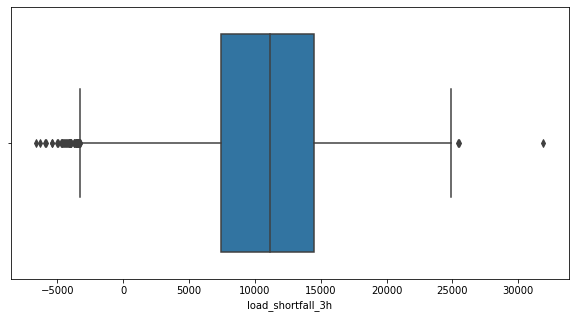

In [ ]:
plt.figure(figsize=(10,5))  
sns.boxplot(x=combined_data['load_shortfall_3h'])

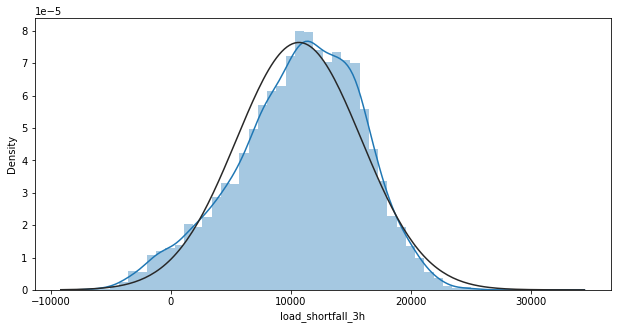

In [ ]:
# have a look at the distribution of the target variable
plt.figure(figsize=(20,5))  
plt.gcf().subplots_adjust(left = 0.5)
g = sns.distplot(combined_data['load_shortfall_3h'],fit=norm ,axlabel = 'load_shortfall_3h', label = 'count')

In [ ]:
# Using Pairplot method to understand the distribution of each variable
# combined_data.hist(figsize=(30,20))
# plt.show()

In [ ]:
# #Density plot for all variables  
# combined_data.plot(kind='density', subplots=True, layout=(45, 3), sharex=False, figsize=(30, 45));

In [ ]:
#separate categorical data from numeric
categorical = combined_data.select_dtypes(exclude=[np.number])
categorical.head()

,time,Valencia_wind_deg,Seville_pressure
0,2015-01-01 03:00:00,level_5,sp25
1,2015-01-01 06:00:00,level_10,sp25
2,2015-01-01 09:00:00,level_9,sp25
3,2015-01-01 12:00:00,level_8,sp25
4,2015-01-01 15:00:00,level_7,sp25


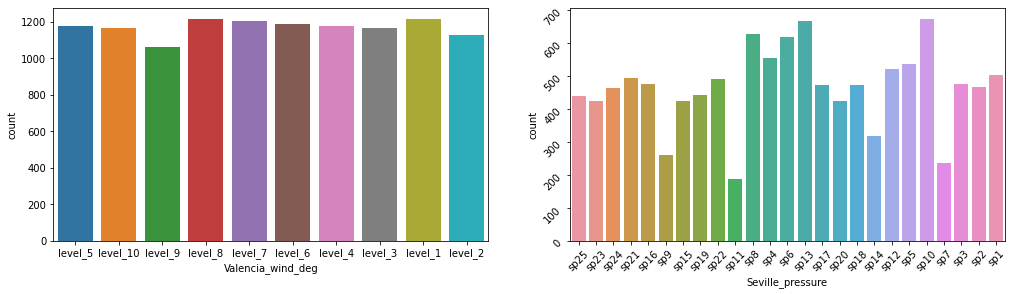

In [ ]:
#Plot countplots of categorical data
fig, ax =plt.subplots(1,2, figsize=(15, 5))
sns.countplot(x=categorical['Valencia_wind_deg'], ax=ax[0])
sns.countplot(x=categorical['Seville_pressure'], ax=ax[1])
ax[1].tick_params(labelrotation=45)
fig.tight_layout(pad=4.0)

In [ ]:
combined_data['Valencia_wind_deg'].value_counts()

level_8     1212
level_1     1212
level_7     1201
level_6     1184
level_4     1177
level_5     1175
level_10    1167
level_3     1167
level_2     1126
level_9     1062
Name: Valencia_wind_deg, dtype: int64

In [ ]:
combined_data['Seville_pressure'].value_counts()

sp10    673
sp13    668
sp8     629
sp6     619
sp4     555
sp5     537
sp12    523
sp1     503
sp21    495
sp22    493
sp3     477
sp16    476
sp17    473
sp18    472
sp2     467
sp24    464
sp19    442
sp25    441
sp15    426
sp20    425
sp23    424
sp14    318
sp9     259
sp7     235
sp11    189
Name: Seville_pressure, dtype: int64

In [ ]:
enc = OrdinalEncoder()

combined_data.Valencia_wind_deg = enc.fit_transform(combined_data[['Valencia_wind_deg']])
combined_data.Seville_pressure = enc.fit_transform(combined_data[['Seville_pressure']])

In [ ]:
combined_data.dtypes.value_counts()

float64    47
object      1
dtype: int64

In [ ]:
#change the data type of time to datetime
combined_data['time']=pd.to_datetime(combined_data['time'])

#seperating time into day,month,year,week and hour
combined_data["day"] = combined_data["time"].dt.day
combined_data["month"] = combined_data["time"].dt.month
combined_data["year"] = combined_data["time"].dt.year
combined_data["weekday"] = combined_data["time"].dt.weekday
combined_data["hour"] = combined_data["time"].dt.hour

Text(0.5, 1.0, 'Spain Electricity Shortfall')

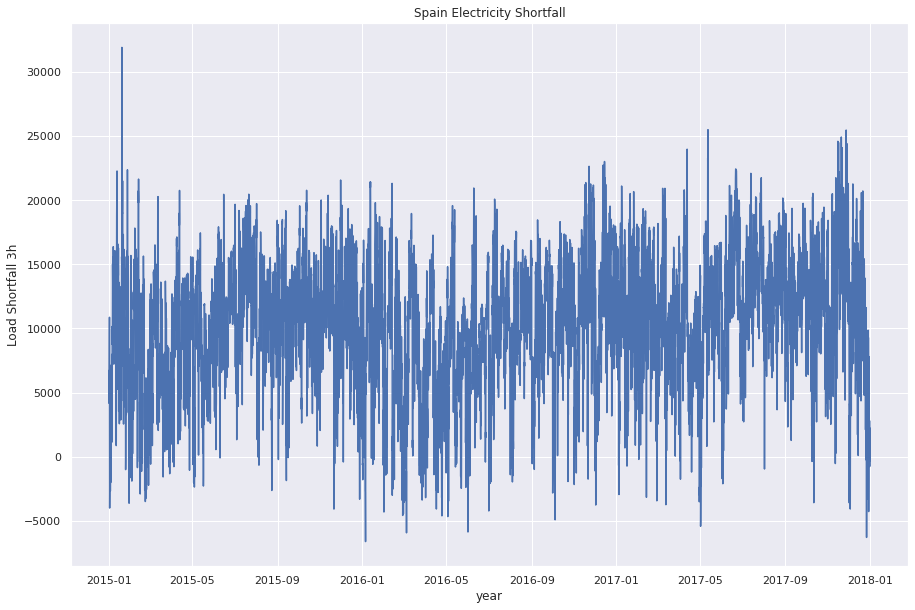

In [ ]:
#lineplot for spain Electricity shortfall againist year
sns.set(rc = {'figure.figsize':(15,10)})
plt.plot(combined_data.time, combined_data.load_shortfall_3h)
plt.xlabel('year')
plt.ylabel('Load Shortfall 3h')
plt.title('Spain Electricity Shortfall')

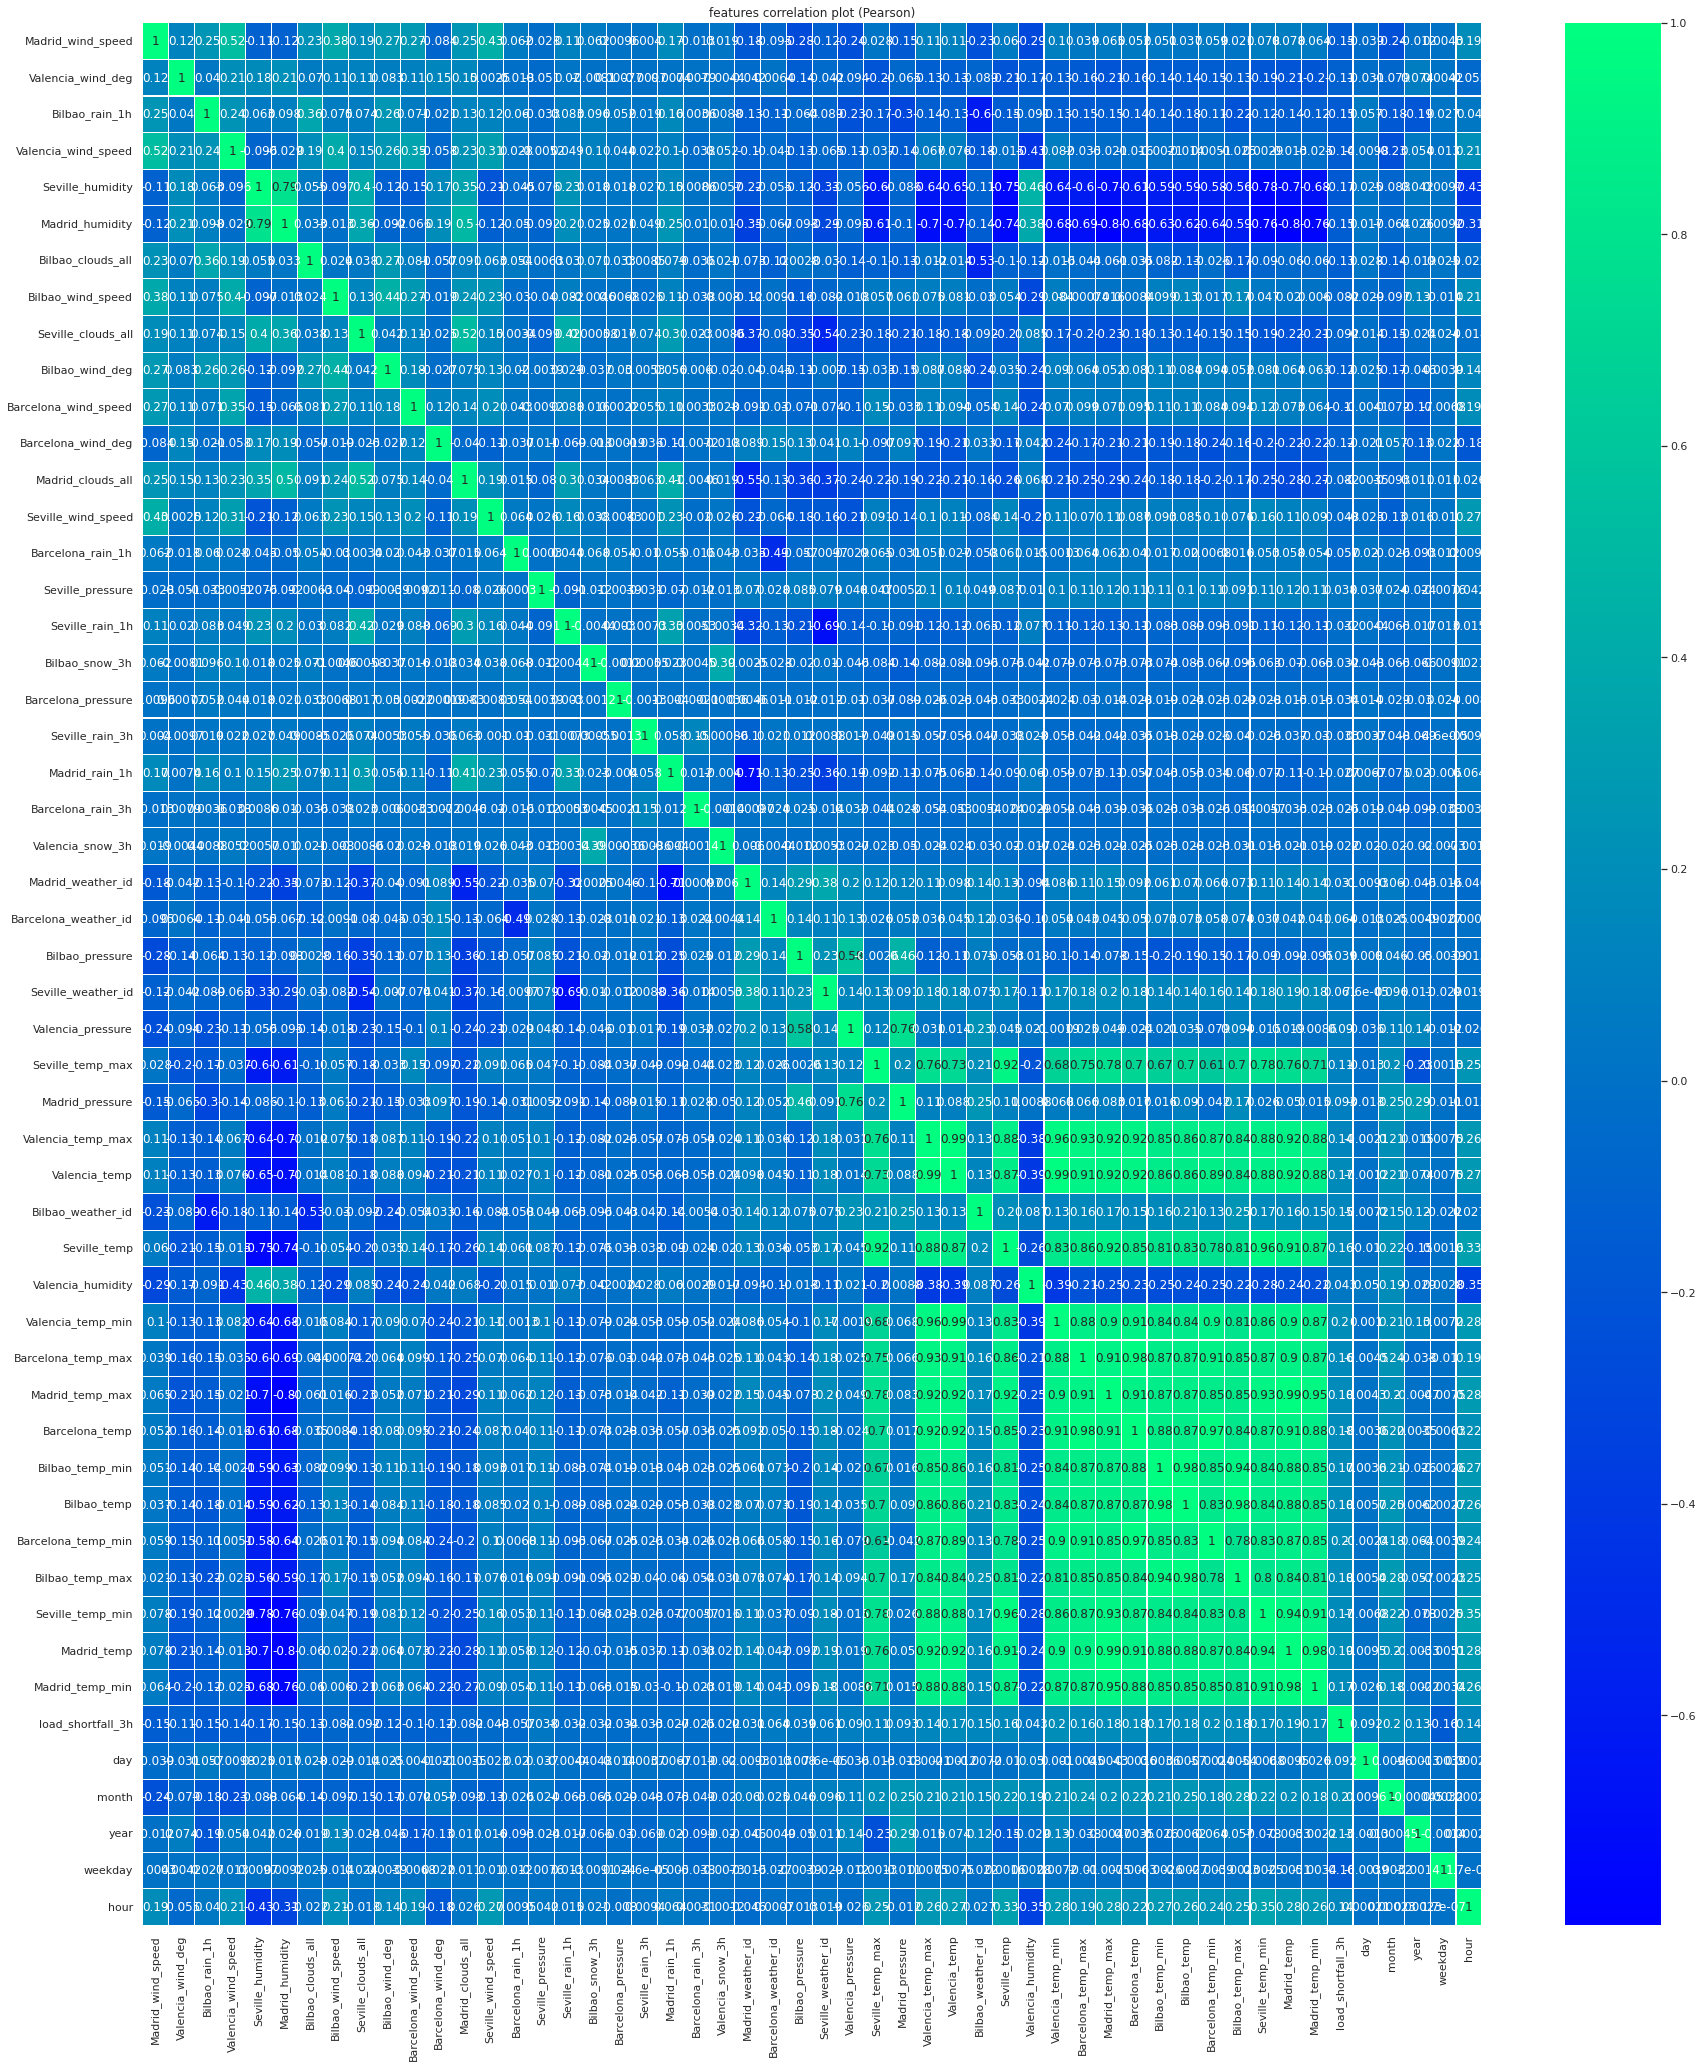

In [ ]:
# evaluate correlation
plt.figure(figsize = (30,35))
plt.title('features correlation plot (Pearson)')
corr = combined_data.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot = True,linewidths=.1,cmap="winter")
plt.show()

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(data, thresh):
    corr_columns = set()  # Set of all the names of correlated columns
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > thresh: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                corr_columns.add(colname)
    return corr_columns

features = correlation(combined_data, 0.8)
features

{'Barcelona_temp',
 'Barcelona_temp_max',
 'Barcelona_temp_min',
 'Bilbao_temp',
 'Bilbao_temp_max',
 'Bilbao_temp_min',
 'Madrid_temp',
 'Madrid_temp_max',
 'Madrid_temp_min',
 'Seville_temp',
 'Seville_temp_min',
 'Valencia_temp',
 'Valencia_temp_min'}

In [ ]:
len(features)

13

In [ ]:
removed_correlated = combined_data.drop(features,axis=1)

In [ ]:
removed_correlated.shape

(11683, 40)

In [ ]:
combined_data.shape

(11683, 53)

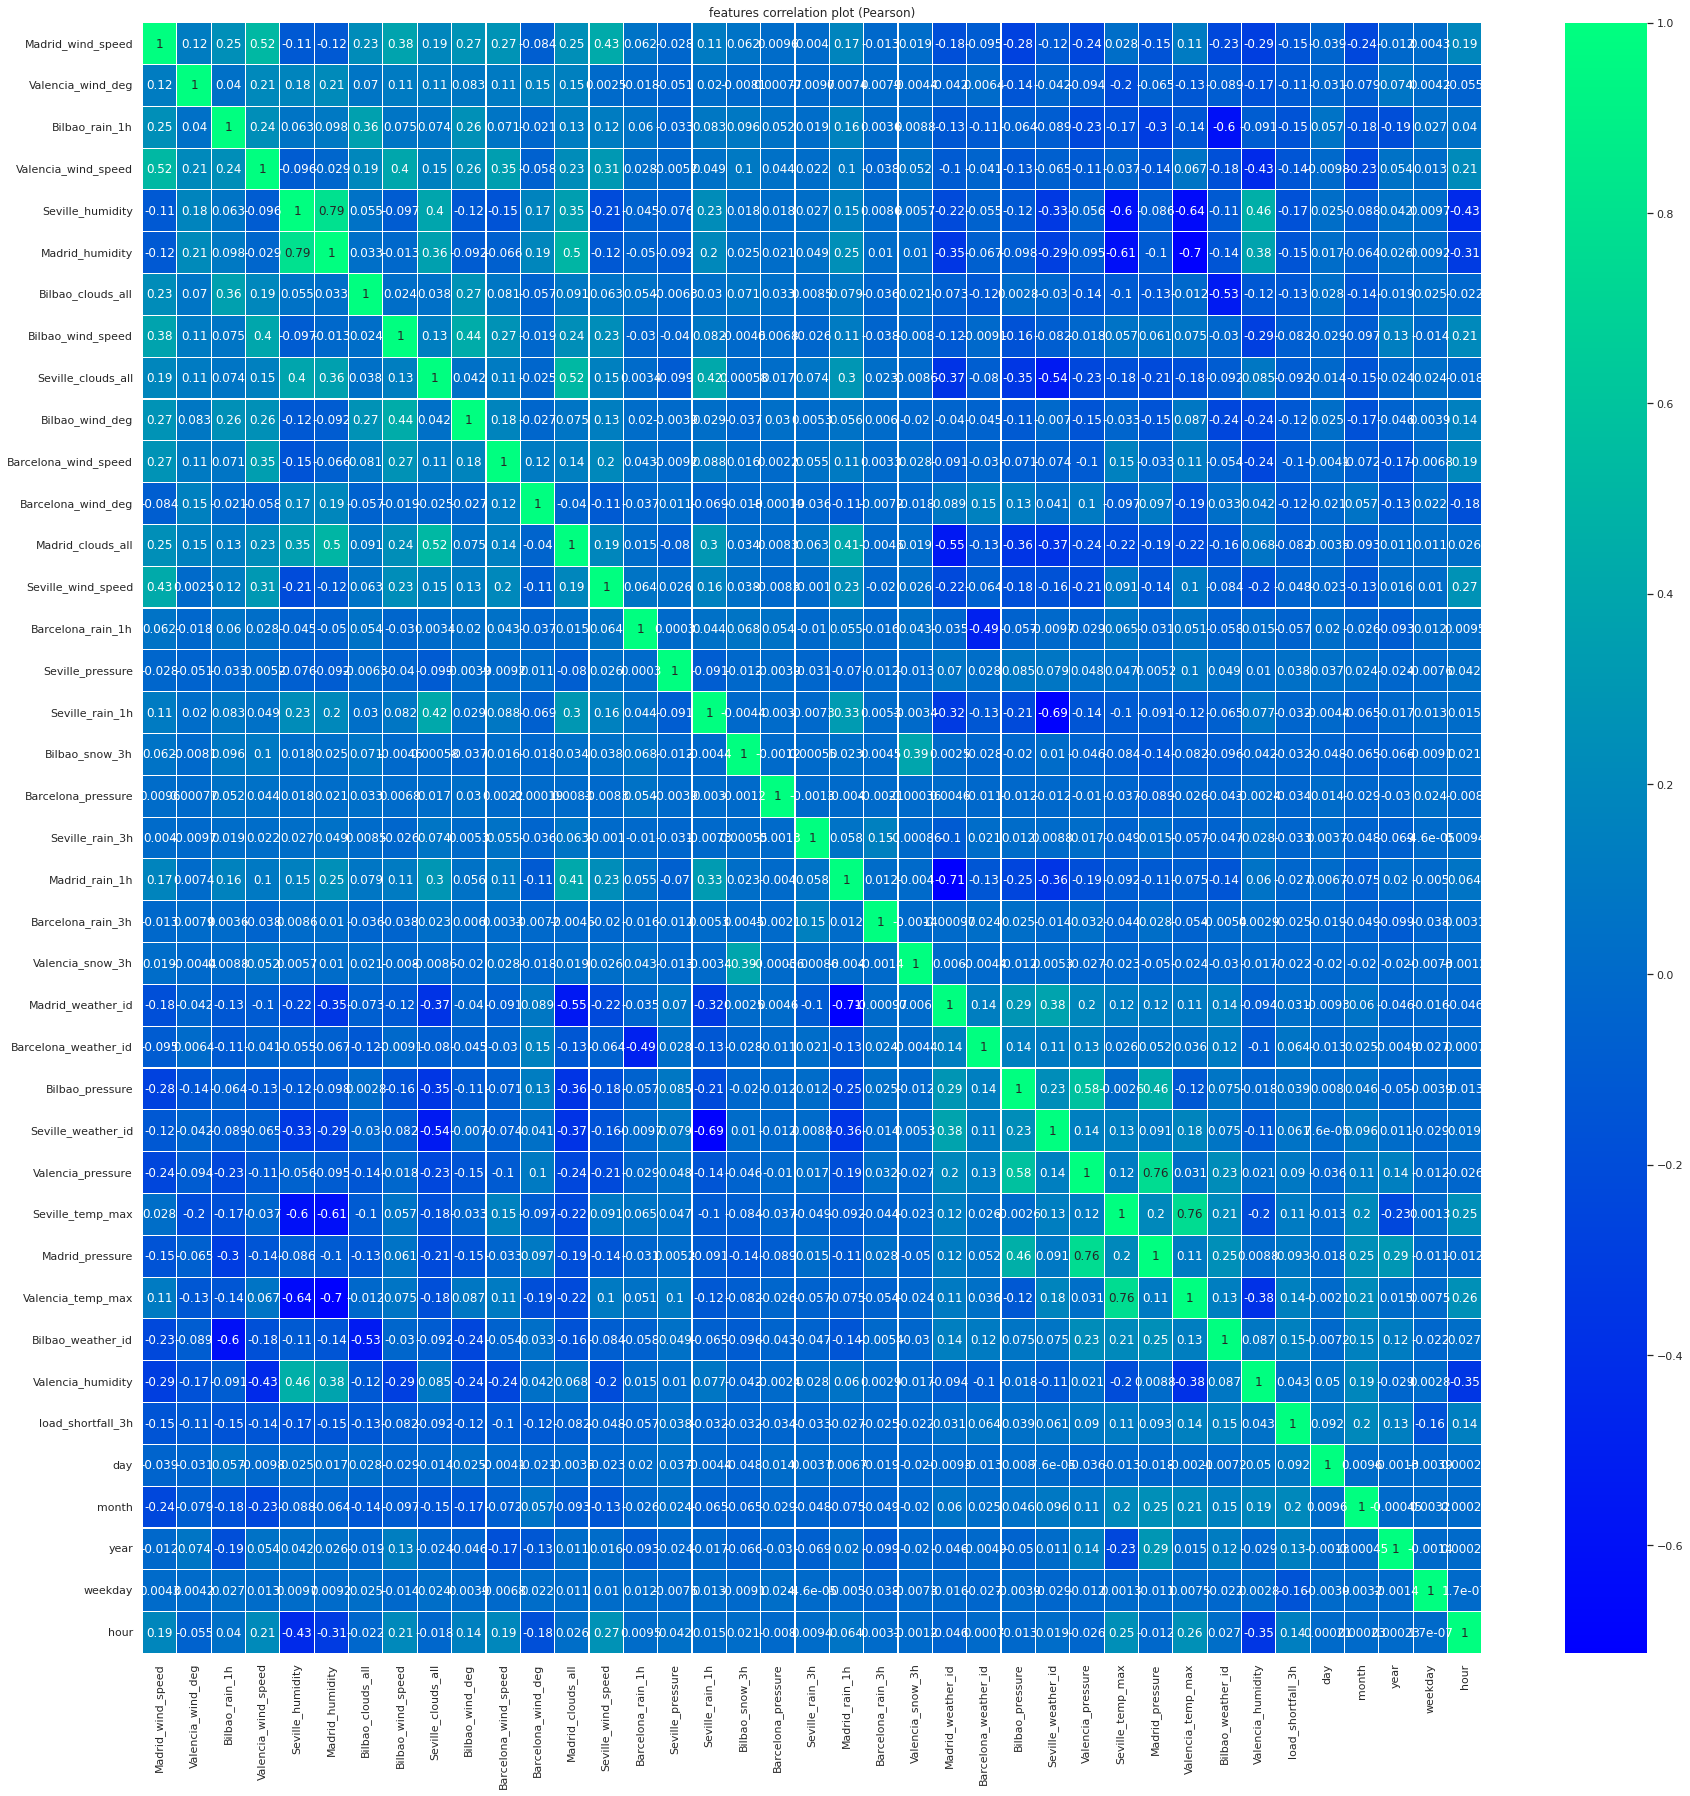

In [ ]:
# evaluate correlation
plt.figure(figsize = (30,30))
plt.title('features correlation plot (Pearson)')
corr = removed_correlated.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot = True,linewidths=.1,cmap="winter")
plt.show()

In [ ]:

# Reorder columns so that our response variable is the last column of the dataframe
column_titles = [col for col in removed_correlated.columns if col!= 'load_shortfall_3h'] + ['load_shortfall_3h']
removed_correlated = removed_correlated.reindex(columns=column_titles)


#drop the time variable
removed_correlated=removed_correlated.drop(['time'],axis=1)

In [ ]:
# split data
X = removed_correlated[:len(train_data)].drop('load_shortfall_3h',axis=1)
y = removed_correlated[:len(train_data)][['load_shortfall_3h']]


# # Ignore for now
# x_train = removed_correlated[:len(df_train)].drop('load_shortfall_3h',axis=1)
# x_test = removed_correlated[len(df_train):].drop('load_shortfall_3h',axis=1)

In [ ]:
y

,load_shortfall_3h
0,6715.666667
1,4171.666667
2,4274.666667
3,5075.666667
4,6620.666667
...,...
8758,-28.333333
8759,2266.666667
8760,822.000000
8761,-760.000000


In [ ]:
# create scaler object
scaler = StandardScaler()

# create scaled version of the predictors (there is no need to scale the response)
scaled_train = scaler.fit_transform(X)

# convert the scaled predictor values into a dataframe
scaled_train = pd.DataFrame(scaled_train,columns=X.columns)
scaled_train.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Bilbao_weather_id,Valencia_humidity,day,month,year,weekday,hour
0,-0.950708,0.248717,-0.362123,-0.796169,0.516117,0.270621,-1.335491,-0.501451,-0.565065,0.630823,1.932284,-1.660205,-0.694188,0.542975,-0.203099,0.735519,-0.224278,-0.057269,-0.024277,-0.066278,-0.247776,-0.110037,-0.017312,0.342424,0.385993,1.718219,0.352274,-1.242351,-2.616796,-1.756232,-2.835227,0.649842,0.540928,-1.675368,-1.602429,-1.226179,-0.00274,-1.090901
1,-1.130863,-1.157189,-0.362123,-0.381412,0.692953,0.298017,-1.335491,-0.501451,-0.565065,0.607959,0.630270,-0.578686,-0.694188,0.542975,-0.203099,0.735519,-0.224278,-0.057269,-0.024206,-0.066278,-0.247776,-0.110037,-0.017312,0.342424,0.385993,1.784583,0.352274,-1.050427,-2.539014,-1.696165,-2.591966,0.649842,0.298645,-1.675368,-1.602429,-1.226179,-0.00274,-0.654451
2,-0.770554,1.654623,-0.362123,-0.657917,0.383491,0.284319,-1.335491,-0.501451,-0.565065,0.542632,-0.485743,1.520733,-0.694188,0.144442,-0.203099,0.735519,-0.224278,-0.057269,-0.024158,-0.066278,-0.247776,-0.110037,-0.017312,0.342424,0.385993,1.817765,0.352274,-0.935272,-2.105564,-1.636097,-1.761812,0.649842,0.021750,-1.675368,-1.602429,-1.226179,-0.00274,-0.218001
3,-0.770554,1.303146,-0.362123,-0.657917,0.118238,-0.044439,-1.335491,-0.501451,-0.565065,0.398912,-0.299741,0.925711,-0.694188,0.941509,-0.203099,0.735519,-0.224278,-0.057269,-0.024229,-0.066278,-0.247776,-0.110037,-0.017312,0.342424,0.385993,1.817765,0.352274,-0.513039,-1.361703,-0.705052,-0.850953,0.649842,-0.583957,-1.675368,-1.602429,-1.226179,-0.00274,0.218449
4,-0.770554,0.951670,-0.362123,-0.657917,-0.161751,-0.017043,-1.274045,-0.894581,-0.565065,0.255192,0.816272,0.779762,-0.694188,0.343708,-0.203099,0.735519,-0.224278,-0.057269,-0.024372,-0.066278,-0.247776,-0.110037,-0.017312,0.342424,0.385993,1.751401,0.352274,0.523351,-1.348214,1.127003,-1.100044,0.649842,-0.358980,-1.675368,-1.602429,-1.226179,-0.00274,0.654899


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [ ]:
models = [LinearRegression() , Lasso(alpha=0.01) , DecisionTreeRegressor(max_depth=6,random_state=0) , 
        RandomForestRegressor(n_estimators=500, random_state=0)]

In [ ]:
# for algo in models:
#     model = algo.fit(X_train, y_train)
#     train_pred = model.predict(X_train)
#     test_pred = model.predict(X_test)
    
#     metric_dict = {'Training RMSE':{
#                         "Linear Regression":metrics.mean_squared_error(y_train, train_pred[0],squared=False),
#                         "LASSO": metrics.mean_squared_error(y_train, train_pred[1],squared=False),
#                         "Decision Tree": metrics.mean_squared_error(y_train, train_pred[2],squared=False),
#                         "Random Forest": metrics.mean_squared_error(y_train, train_pred[3],squared=False)
#                 },
#                 'Test RMSE':{
#                         "Linear Regression": metrics.mean_squared_error(y_test, test_pred[0],squared=False),
#                         "LASSO": metrics.mean_squared_error(y_test, test_pred[1],squared=False),
#                         "Decision Tree": metrics.mean_squared_error(y_test,  test_pred[2],squared=False),
#                         "Random Forest": metrics.mean_squared_error(y_test, test_pred[3],squared=False)
#                 },
#                 'Train R^2':{
#                         "Linear Regression":metrics.r2_score(y_train, train_pred[0]),
#                         "LASSO":metrics.r2_score(y_train, train_pred[1]),
#                         "Decision Tree":metrics.r2_score(y_train, train_pred[2]),
#                         "Random Forest":metrics.r2_score(y_train,train_pred[3])
                    
#                 },
#                 'Test R^2':{
#                         "Linear Regression":metrics.r2_score(y_test, test_pred[0]),
#                         "LASSO":metrics.r2_score(y_test, test_pred[1]),
#                         "Decision Tree":metrics.r2_score(y_test,test_pred[2]),
#                         "Random Forest":metrics.r2_score(y_test,test_pred[3])}
#                 }
# output=pd.DataFrame(metric_dict)
# output
    

In [ ]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

#Lasso Regression
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

tree = DecisionTreeRegressor(max_depth=6,random_state=0)
tree.fit(X_train,y_train)

forest = RandomForestRegressor(n_estimators=1000, random_state=0)
forest.fit(X_train,y_train)

xgbr = xgb.XGBRegressor(obective = "reg:squarederror" , n_estimators=1000)
data_dmatrix = xgb.DMatrix(X, y)
xgbr.fit(X_train, y_train)

NameError: ignored

In [ ]:
lin_train_pred = lin_reg.predict(X_train)
lasso_train_pred = lasso.predict(X_train)
tree_train_pred = tree.predict(X_train)
forest_train_pred = forest.predict(X_train)
xtrain_pred = xgbr.predict(X_train)

# Make test set predictions for each model
lin_test_pred = lin_reg.predict(X_test)
lasso_test_pred = lasso.predict(X_test)
tree_test_pred = tree.predict(X_test)
forest_test_pred = forest.predict(X_test)
xtest_pred = xgbr.predict(X_test)

In [ ]:
metric_dict = {'Training RMSE':{
                        "Linear Regression":metrics.mean_squared_error(y_train, lin_train_pred,squared=False),
                        "LASSO": metrics.mean_squared_error(y_train, lasso_train_pred,squared=False),
                        "Decision Tree": metrics.mean_squared_error(y_train, tree_train_pred,squared=False),
                        "Random Forest": metrics.mean_squared_error(y_train, forest_train_pred,squared=False),
                        "XGBoostRegressor": metrics.mean_squared_error(y_train, xtrain_pred,squared=False)
                },
                'Test RMSE':{
                        "Linear Regression": metrics.mean_squared_error(y_test, lin_test_pred,squared=False),
                        "LASSO": metrics.mean_squared_error(y_test, lasso_test_pred,squared=False),
                        "Decision Tree": metrics.mean_squared_error(y_test,  tree_test_pred,squared=False),
                        "Random Forest": metrics.mean_squared_error(y_test, forest_test_pred,squared=False),
                        "XGBoostRegressor": metrics.mean_squared_error(y_test, xtest_pred,squared=False)
                },
                'Train R^2':{
                        "Linear Regression":metrics.r2_score(y_train, lin_train_pred),
                        "LASSO":metrics.r2_score(y_train, lasso_train_pred),
                        "Decision Tree":metrics.r2_score(y_train, tree_train_pred),
                        "Random Forest":metrics.r2_score(y_train,forest_train_pred),
                        "XGBoostRegressor":metrics.r2_score(y_train,xtrain_pred)
                    
                },
                'Test R^2':{
                        "Linear Regression":metrics.r2_score(y_test, lin_test_pred),
                        "LASSO":metrics.r2_score(y_test, lasso_test_pred),
                        "Decision Tree":metrics.r2_score(y_test,tree_test_pred),
                        "Random Forest":metrics.r2_score(y_test,forest_test_pred),
                        "XGBoostRegressor":metrics.r2_score(y_test,xtest_pred)}
                }
output=pd.DataFrame(metric_dict)
output
    

,Training RMSE,Test RMSE,Train R^2,Test R^2
Linear Regression,4731.819436,4815.442944,0.170435,0.176629
LASSO,4731.820942,4815.444569,0.170434,0.176629
Decision Tree,3627.683518,3903.341821,0.512412,0.459002
Random Forest,999.954723,2782.541650,0.962953,0.725080
XGBoostRegressor,1909.289573,2864.594587,0.864937,0.708627


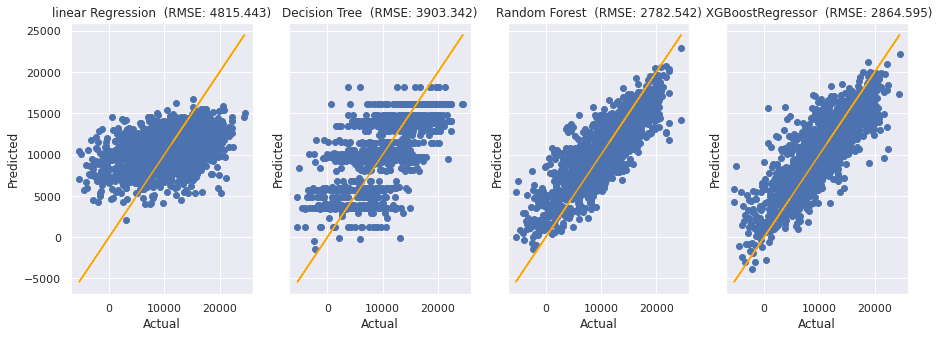

In [ ]:
f, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=4,sharey=True)

# Create list of titles and predictions to use in for loop
pred = [lin_reg.predict(X_test), tree.predict(X_test), forest.predict(X_test) , xgbr.predict(X_test)]
title = ['linear Regression', 'Decision Tree', 'Random Forest', ' XGBoostRegressor']

# Loop through all axes to plot each models' results 
for i in range(4):
    rmse = round(np.sqrt(metrics.mean_squared_error(pred[i],y_test)),3)
    ax[i].set_title(title[i]+"  (RMSE: "+str(rmse)+ ")")
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].plot(y_test,y_test,'orange')
    ax[i].scatter(y_test,pred[i])

In [ ]:
params = {'obective':"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [ ]:
cv_results.tail()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
45,3052.167318,33.359737,3480.312907,67.932311
46,3029.318766,35.857052,3464.725342,66.420552
47,3005.923665,39.711133,3446.930420,65.922276
48,2982.837728,33.049371,3429.868083,59.307839
49,2967.033691,27.050112,3420.650960,58.503219


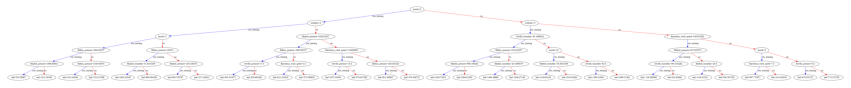

In [ ]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [30, 25]
plt.show()

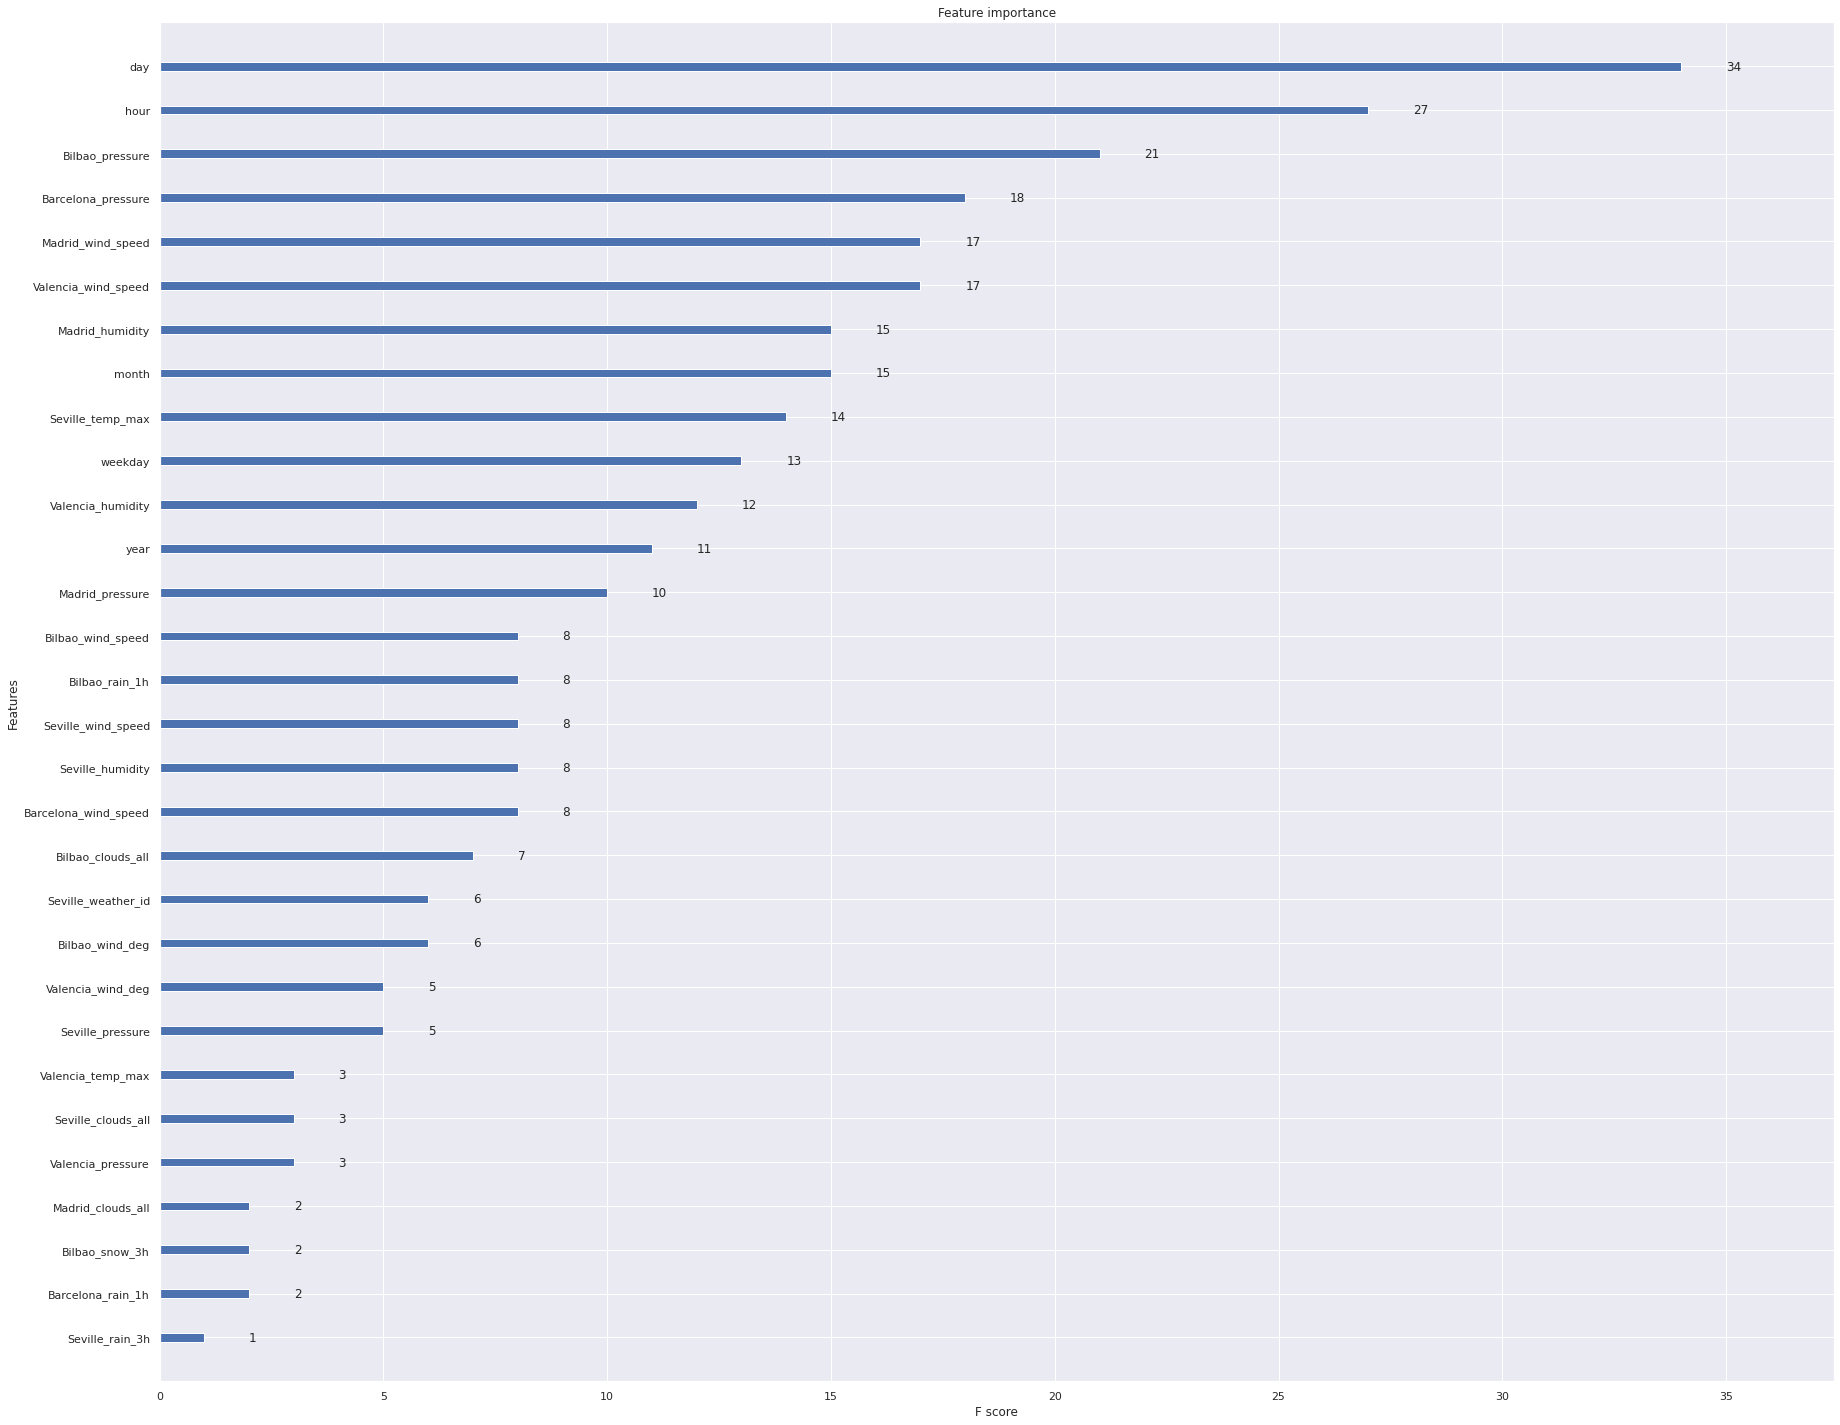

In [ ]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [12, 14]
plt.show()

In [ ]:
from pprint import pprint

rand_forest = RandomForestRegressor(random_state = 42)


In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

max_depth.append(None)
# Minimum number of samples required to split a node

min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node

min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree

bootstrap = [True, False]

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': bootstrap,
    'max_depth': max_depth,
    'max_features': max_features,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'n_estimators': n_estimators
}

In [ ]:
# Instantiate the grid search model
grid_searchcv = GridSearchCV(estimator = rand_forest, param_grid = param_grid, 
                          cv = 2 , n_jobs = -1)

In [ ]:
grid_searchcv.fit(X_train, y_train)
pprint(grid_searchcv.get_params())

KeyboardInterrupt: ignored

In [ ]:
rand_forest_tuned = RandomForestRegressor(random_state = 42, )

In [ ]:
model = rand_forest_tuned.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [ ]:
metric_dict = {'Training RMSE':{
                        "Random Forest": metrics.mean_squared_error(y_train, train_pred,squared=False)
                },
                'Test RMSE':{
                        "Random Forest": metrics.mean_squared_error(y_test, test_pred,squared=False)
                },
                'Train R^2':{
                        "Random Forest":metrics.r2_score(y_train,train_pred)
                    
                },
                'Test R^2':{
                        "Random Forest":metrics.r2_score(y_test,test_pred)}
                }
output=pd.DataFrame(metric_dict)
output

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    rmse = 
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [ ]:
base_accuracy = evaluate(forest, X_test, y_test)


In [ ]:
#Make submission
# X_train = removed_correlated[:len(train_data)].drop('load_shortfall_3h',axis=1)
X_test = removed_correlated[len(train_data):].drop('load_shortfall_3h',axis=1)

In [ ]:
time = pd.DataFrame({'time': combined_data[len(train_data):].time})

In [ ]:
time

In [ ]:
# forest.fit(X_train, y)
test_prediction = forest.predict(X_test)

In [ ]:
output = pd.DataFrame(test_prediction,columns=['load_shortfall_3h'])
output

In [ ]:
# results =pd.DataFrame({'time': combined_data[len(train_data):].time})
data = pd.concat([output, time.reindex(output.index)], axis=1)
# submission.to_csv('submission.csv',index=False)

In [ ]:
data.rename(columns={"time": "timex"} , inplace=True)
data.insert(0, 'time', copy_test.time.values)
data.drop(['timex'],axis=1, inplace=True)

In [ ]:
data

In [ ]:
data.to_csv('sample_submission_load_shortfall.csv' , index=False)

In [ ]:
import pandas as pd 
data = pd.read_csv('sample_data/combined_data.csv')
data

,our_competitors,Date_Posted,Media_Type,Post_Caption,Likes_Counts,Comments_Counts,Shared_Counts,total_followers
0,Africa Data School,2022-03-25 18:20:19.177371,Image,"Kickstart your Career in Finance, Healthcare, ...",3,0,0,546
1,Africa Data School,2022-04-22 18:20:19.177371,Image,The Africa Data School community invites you t...,0,0,0,546
2,Africa Data School,2022-04-21 18:20:19.177371,Image,"""Design doesn’t mean that every person is gonn...",1,0,0,546
3,Africa Data School,2022-04-20 18:20:19.177371,Image,Gather data from many sources learn to create ...,0,0,0,546
4,Africa Data School,2022-04-20 18:20:19.177371,Image,"Kickstart your Career in Finance, Healthcare, ...",1,0,0,546
...,...,...,...,...,...,...,...,...
936,HyperionDev,2022-04-25 17:48:06.417603,Image,We are officially launching a HyperionDev Alum...,12,0,0,"6,317"
937,HyperionDev,2022-04-25 17:48:06.417603,Image,A big congratulations to Tevin who joined us f...,22,2,1,"6,317"
938,HyperionDev,2022-04-25 17:48:06.417603,Image,Our dedicated team of coding mentors ensure th...,5,0,0,"6,317"
939,HyperionDev,2022-04-25 17:48:06.417603,Image,"""Chanelle always puts in amazing effort into e...",25,1,0,"6,317"
